<a href="https://colab.research.google.com/github/anitahf/Clase---Aprendizaje-Automatico/blob/main/Taller_04_Agrupamiento_kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Anita Hidalgo &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/anitahf/Clase---Aprendizaje-Automatico/refs/heads/main/dataset.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# Estadísticas descriptivas
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# Seleccionar solo columnas numéricas
X = df.select_dtypes(include=[np.number])

X.head()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


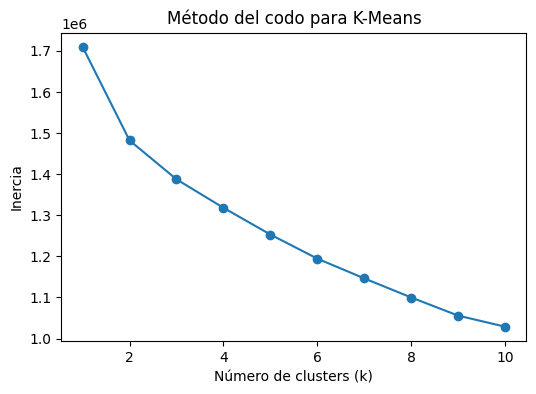

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para guardar la inercia
inercia = []

# Rango de k
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(6,4))
plt.plot(k_values, inercia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para K-Means")
plt.show()


En este grafico del codo, se puede ver un cambio en la pendiente alrededor de k = 3 o k = 4.
Desde ese punto, la reducción de la inercia es menor, lo que indica que agregar más clusters no mejora significativamente el modelo.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [ ]:
# Modelo final con el k óptimo (ejemplo k=3)
k_optimo = 3
modelo_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)

# Asignación de grupos
df['Cluster'] = modelo_final.fit_predict(X_scaled)

df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,2


In [ ]:
# Seleccionar solo columnas numéricas (excluyendo texto)
df_numerico = df.select_dtypes(include=['number'])

# Media por cluster
media_clusters = df_numerico.groupby(df['Cluster']).mean()
media_clusters

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
Cluster,,,,,,,,,,,,,,,,
0,50229.192576,34.455259,262161.071041,0.485848,0.798201,5.336632,-6.133129,0.610172,0.080272,0.087805,0.211501,0.248713,0.332258,134.638940,3.933557,0.0
1,60488.291146,33.497233,208189.301014,0.679844,0.690930,5.457684,-6.841360,0.623970,0.101258,0.272256,0.039359,0.203975,0.663369,118.569916,3.981715,1.0
2,60372.536714,30.710609,215909.354969,0.452363,0.280410,4.942399,-14.770855,0.711281,0.055700,0.774534,0.319617,0.177505,0.292536,109.721587,3.687770,2.0


In [ ]:
# Mínimos por cluster
min_clusters = df_numerico.groupby(df['Cluster']).min()

# Máximos por cluster
max_clusters = df_numerico.groupby(df['Cluster']).max()

display(min_clusters)
display(max_clusters)


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
Cluster,,,,,,,,,,,,,,,,
0,9,0,21240,0.0513,0.000071,0,-25.297,0,0.0221,0.000000,0.0,0.01120,0.0000,36.95,1,0
1,0,0,0,0.2060,0.094000,0,-22.400,0,0.0221,0.000002,0.0,0.00925,0.0367,37.49,1,1
2,1,0,8586,0.0000,0.000000,0,-49.531,0,0.0000,0.000000,0.0,0.00000,0.0000,0.00,0,2


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster
Cluster,,,,,,,,,,,,,,,,
0,113993,100,5237295,0.970,1.0,11,4.532,1,0.961,0.988,0.999,1.000,0.988,220.081,5,0
1,113999,100,1240944,0.985,1.0,11,1.821,1,0.965,0.995,0.978,1.000,0.995,219.571,5,1
2,113996,94,3601693,0.964,1.0,11,-0.689,1,0.962,0.996,1.000,0.994,0.983,243.372,5,2


In [ ]:
# Mostrar 5 elementos de cada cluster
for c in range(k_optimo):
    print(f"\nCluster {c}:")
    display(df[df['Cluster'] == c].head())


Cluster 0:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,...,1,0.0295,0.426,0.004190,0.0735,0.196,78.899,4,acoustic,0
15,15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,0.489,0.561,...,1,0.0274,0.200,0.000046,0.1790,0.238,83.457,3,acoustic,0
32,32,1m5LC29RE52Bxy7hxvpOlL,Chord Overstreet,Christmas Country Songs 2022,All I Want For Christmas Is A Real Good Tan,0,234186,False,0.593,0.455,...,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,acoustic,0
40,40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,0,306794,False,0.474,0.519,...,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,acoustic,0
44,44,6JGjevTaqr9J1xp7YvYUKF,Brandi Carlile,Finest Country,"Speak Your Mind (From the Netflix Series ""We T...",0,193943,False,0.476,0.666,...,1,0.0446,0.314,0.000000,0.3420,0.498,148.155,4,acoustic,0



Cluster 1:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,acoustic,1
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,1,0.0417,0.5590,0.000000,0.0973,0.712,150.960,4,acoustic,1
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,...,1,0.0369,0.2940,0.000000,0.1510,0.669,130.088,4,acoustic,1
10,10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.363,...,1,0.0291,0.2790,0.000000,0.0928,0.301,99.905,4,acoustic,1



Cluster 2:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.924,0.000006,0.1010,0.2670,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.469,0.000000,0.0829,0.1670,119.949,4,acoustic,2
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,2


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

 Yo les daria los siguientes nombres:

Cluster 0 – Canciones tranquilas

Tiene canciones suaves, con poca energía y baja popularidad. Son temas calmados y relajados.

Cluster 1 – Canciones populares y alegres

Podemos ver que tiene canciones más conocidas, con mayor ritmo y más fáciles de bailar. Son temas comerciales y animados.

Cluster 2 – Canciones emotivas

Tiene canciones lentas y emocionales, con baja energía y estilo más acústico.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

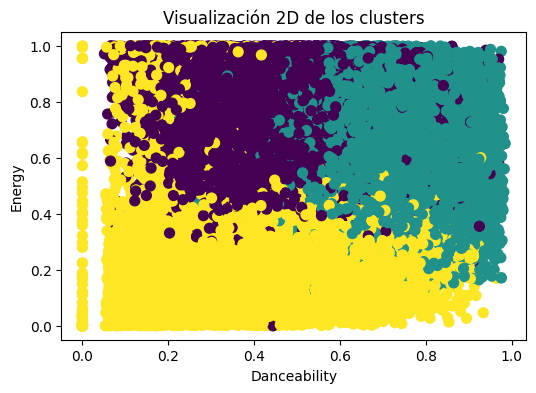

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['danceability'], df['energy'], c=df['Cluster'], s=50)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Visualización 2D de los clusters")
plt.show()


Los grupos se ven buenos, ya que se observa una separación general entre canciones con baja y alta danceability y energy, que son las variables que uso para identificar los estilos de canciones.
Aunque quiza esten amontados entre los clusters, los grupos representan diferencias claras entre tipos de canciones, por lo que el resultado del clustering es bueno.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [ ]:
from sklearn.manifold import TSNE

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Gráfica
plt.figure(figsize=(6,4))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df['Cluster'], s=50)
plt.title("Visualización 2D con t-SNE")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.show()


Los grupos se observan bastante bien separados, especialmente en partes donde las canciones comparten características similares.


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el silhouette score
sil_score = silhouette_score(X_scaled, df['Cluster'])
sil_score


El valor de la métrica de la silueta indica que los grupos son aceptables, ya que existe una separación razonable entre los clusters.
Esto sugiere que el modelo de clustering logró agrupar correctamente los datos, aunque aún puede existir cierto redundancia entre algunos grupos.